In [1]:
!pip3 install pymongo

In [3]:
! curl https://pokeapi.co/api/v2/pokemon/25 | jq ".sprites.front_default" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  173k    0  173k    0     0  1402k      0 --:--:-- --:--:-- --:--:-- 1410k
"https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/25.png"


# Connecting to mongodb

In [1]:
from pymongo import MongoClient

dbName = "datamad0620"
mongodbURL = f"mongodb://localhost/{dbName}"

client = MongoClient(mongodbURL, connectTimeoutMS=2000, serverSelectionTimeoutMS=2000)
db = client.get_database()

In [2]:
cursor = db.list_collections()
for collection in cursor:
    print(collection["name"])

pokemons
alumnos
companies
profes


## Making queries

In [3]:
query = {
    "$and":[
        {"founded_year":{"$gte":2010}},
        {"founded_year":{"$lte":2011}}
    ]
}

cur = db.companies.find(query).limit(2)
data = list(cur)
len(data)

2

In [4]:
db.companies.find_one(query)

{'_id': ObjectId('52cdef7c4bab8bd675297ea7'),
 'name': 'Mokitown',
 'permalink': 'mokitown',
 'crunchbase_url': 'http://www.crunchbase.com/company/mokitown',
 'homepage_url': 'http://www.mokitown.com',
 'blog_url': '',
 'blog_feed_url': '',
 'twitter_username': '',
 'category_code': 'web',
 'number_of_employees': None,
 'founded_year': 2011,
 'founded_month': 11,
 'founded_day': 26,
 'deadpooled_year': None,
 'deadpooled_month': None,
 'deadpooled_day': None,
 'deadpooled_url': None,
 'tag_list': 'mokitown, virtualworld, crunchbase',
 'alias_list': '',
 'email_address': '',
 'phone_number': '',
 'description': '',
 'created_at': 'Tue Aug 07 05:47:56 UTC 2007',
 'updated_at': 'Tue Mar 19 01:07:12 UTC 2013',
 'overview': '<p>Mokitown is a virtual world for kids owned by Daimler Chrysler. Kids can explore the world, invite friends for meetings, chat with other users and learn about road safety by playing with a flying robot named Benedikt.</p>\n\n<p>Daimler Chrysler created the Mokitown w

In [10]:
%time

cur = db.companies.find()
for company in cur:
    print(company["name"])
    break

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 112 µs
Zoho


In [9]:
%time

cur = db.companies.find()
for company in list(cur):
    print(company["name"])
    break

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.3 µs
Zoho


In [12]:
def getCompaniesWithState(state="CA"):
    return {
      "$and": [
        { "offices": { "$elemMatch": { "state_code": state } } },
        { "offices": { "$not":{"$size": 1 } }}
      ]
    }

In [16]:
list(db.companies.find(getCompaniesWithState("NY")).limit(1))

[{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
  'name': 'Wetpaint',
  'permalink': 'abc2',
  'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
  'homepage_url': 'http://wetpaint-inc.com',
  'blog_url': 'http://digitalquarters.net/',
  'blog_feed_url': 'http://digitalquarters.net/feed/',
  'twitter_username': 'BachelrWetpaint',
  'category_code': 'web',
  'number_of_employees': 47,
  'founded_year': 2005,
  'founded_month': 10,
  'founded_day': 17,
  'deadpooled_year': 1,
  'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
  'alias_list': '',
  'email_address': 'info@wetpaint.com',
  'phone_number': '206.859.6300',
  'description': 'Technology Platform Company',
  'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
  'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
  'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and mon

In [19]:
db.companies.find_one(getCompaniesWithState("NY"))

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

## Projections & sort

In [20]:
db.companies.find_one(getCompaniesWithState("NY"),{"name":1, "offices":1})

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'offices': [{'description': '',
   'address1': '710 - 2nd Avenue',
   'address2': 'Suite 1100',
   'zip_code': '98104',
   'city': 'Seattle',
   'state_code': 'WA',
   'country_code': 'USA',
   'latitude': 47.603122,
   'longitude': -122.333253},
  {'description': '',
   'address1': '270 Lafayette Street',
   'address2': 'Suite 505',
   'zip_code': '10012',
   'city': 'New York',
   'state_code': 'NY',
   'country_code': 'USA',
   'latitude': 40.7237306,
   'longitude': -73.9964312}]}

In [28]:
def getCompaniesMola(state="CA"):
    query = {
      "$and": [
        { "offices": { "$elemMatch": { "state_code": state } } },
        { "offices": { "$not":{"$size": 1 } }}
      ]
    }

    projection = {"name":1, "offices.city":1, "_id":0}
 
    return [query, projection]

In [29]:
db.companies.find_one(*getCompaniesMola("NY"))

{'name': 'Wetpaint', 'offices': [{'city': 'Seattle'}, {'city': 'New York'}]}

In [30]:
list(db.companies.find(*getCompaniesMola("NY")))

[{'name': 'Wetpaint', 'offices': [{'city': 'Seattle'}, {'city': 'New York'}]},
 {'name': 'StumbleUpon',
  'offices': [{'city': 'San Francisco'}, {'city': 'New York City'}]},
 {'name': 'Facebook',
  'offices': [{'city': 'Menlo Park'},
   {'city': 'Dublin'},
   {'city': 'New York'}]},
 {'name': 'AddThis',
  'offices': [{'city': 'Vienna'},
   {'city': 'New York'},
   {'city': 'Culver City'},
   {'city': 'Chicago'},
   {'city': 'San Francisco'},
   {'city': 'Troy'}]},
 {'name': 'OpenX',
  'offices': [{'city': 'Pasadena'},
   {'city': 'New York'},
   {'city': 'London'},
   {'city': 'Tokyo'},
   {'city': 'Munich'}]},
 {'name': 'Mashery',
  'offices': [{'city': 'San Francisco'},
   {'city': 'New York'},
   {'city': 'Boston'}]},
 {'name': 'KickApps',
  'offices': [{'city': 'New York'},
   {'city': 'Venice'},
   {'city': 'San Francisco'},
   {'city': 'London'}]},
 {'name': 'Google',
  'offices': [{'city': 'Mountain View'},
   {'city': 'Ann Arbor'},
   {'city': 'Atlanta'},
   {'city': 'Austin'},

In [34]:
list(db.companies.find(*getCompaniesMola("NY")).skip(1).limit(2))

[{'name': 'StumbleUpon',
  'offices': [{'city': 'San Francisco'}, {'city': 'New York City'}]},
 {'name': 'Facebook',
  'offices': [{'city': 'Menlo Park'},
   {'city': 'Dublin'},
   {'city': 'New York'}]}]

In [39]:
db.companies.find({
      "$and": [
        { "offices": { "$elemMatch": { "state_code": "NY" } } },
        { "offices": { "$not":{"$size": 1 } }}
      ]
    }).count()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


318

In [43]:
from pymongo import ASCENDING, DESCENDING
cur = db.companies.find(*getCompaniesMola("NY")).sort([("name",DESCENDING)])
list(cur)

[{'name': 'tagga', 'offices': [{'city': 'Vancouver'}, {'city': 'New York'}]},
 {'name': 'smartFOCUS',
  'offices': [{'city': 'Bristol'},
   {'city': 'London'},
   {'city': 'New York'},
   {'city': 'Clichy'},
   {'city': 'São Paulo'},
   {'city': 'Hong-Kong'}]},
 {'name': 'mySupermarket',
  'offices': [{'city': 'New York'}, {'city': 'London'}, {'city': 'Lod'}]},
 {'name': 'muzu tv',
  'offices': [{'city': 'Dublin'},
   {'city': 'London'},
   {'city': 'New York'},
   {'city': 'Waterford'}]},
 {'name': 'match2blue',
  'offices': [{'city': 'New York City'}, {'city': 'Mainz'}]},
 {'name': 'ividence',
  'offices': [{'city': 'Paris'},
   {'city': 'San Francisco'},
   {'city': 'New York'}]},
 {'name': 'iPharro Media',
  'offices': [{'city': 'Darmstadt'}, {'city': 'New York'}]},
 {'name': 'iPerceptions',
  'offices': [{'city': 'New York'}, {'city': 'Montreal, QC'}]},
 {'name': 'iPayStation',
  'offices': [{'city': 'Clearwater'},
   {'city': 'New York'},
   {'city': 'Gardner'}]},
 {'name': 'iCro

In [45]:
cur = db.companies.find(*getCompaniesMola("NY")).sort([("offices.city",ASCENDING)])
list(cur)

[{'name': 'Google',
  'offices': [{'city': 'Mountain View'},
   {'city': 'Ann Arbor'},
   {'city': 'Atlanta'},
   {'city': 'Austin'},
   {'city': 'Boulder'},
   {'city': 'Cambridge'},
   {'city': 'Chicago'},
   {'city': 'Coppell'},
   {'city': 'Dallas'},
   {'city': 'Denver'},
   {'city': 'Birmingham'},
   {'city': 'Irvine'},
   {'city': 'Kirkland'},
   {'city': 'New York'},
   {'city': 'Tempe'},
   {'city': 'Pittsburgh'},
   {'city': 'San Francisco'},
   {'city': 'Santa Monica'},
   {'city': 'Seattle'},
   {'city': 'Seattle'},
   {'city': 'Washington'},
   {'city': 'Melbourne'},
   {'city': 'Sydney'},
   {'city': 'Beijing'},
   {'city': 'Guangzhou'},
   {'city': 'Shanghai'},
   {'city': 'Central'},
   {'city': 'Bangalore'},
   {'city': 'Gurgaon'},
   {'city': 'New Delhi'},
   {'city': 'Hyderabad'},
   {'city': 'Mumbai'},
   {'city': 'Tokyo'},
   {'city': 'Osaka'},
   {'city': 'Seoul'},
   {'city': 'Singapore'},
   {'city': 'Taipei'},
   {'city': ''},
   {'city': ''},
   {'city': 'Hels

# From mongodb to pandas

In [53]:
import pandas as pd

data = list(db.companies.find({"number_of_employees":{"$type":"number"}},{'number_of_employees':1, "name":1}).limit(5))

data

[{'_id': ObjectId('52cdef7c4bab8bd675297d8c'),
  'name': 'Zoho',
  'number_of_employees': 1600},
 {'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
  'name': 'Wetpaint',
  'number_of_employees': 47},
 {'_id': ObjectId('52cdef7c4bab8bd675297d8b'),
  'name': 'AdventNet',
  'number_of_employees': 600},
 {'_id': ObjectId('52cdef7c4bab8bd675297d8d'),
  'name': 'Digg',
  'number_of_employees': 60},
 {'_id': ObjectId('52cdef7c4bab8bd675297d91'),
  'name': 'Geni',
  'number_of_employees': 18}]

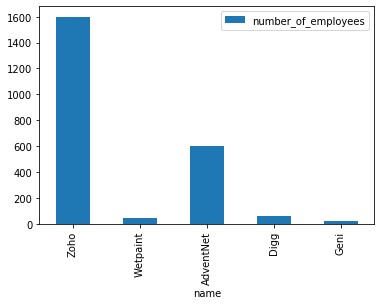

In [59]:
%matplotlib inline
df = pd.DataFrame(data)
df[["name","number_of_employees"]].set_index("name").plot.bar()

In [64]:
query = {"number_of_employees":{"$type":"number"}}
projection = {'number_of_employees':1, "name":1, "offices":1}

cur = db.companies.find(query, projection).limit(5)
data = list(cur)
df = pd.DataFrame(data)
df

,_id,name,number_of_employees,offices
0,52cdef7c4bab8bd675297d8c,Zoho,1600,"[{'description': 'Headquarters', 'address1': '..."
1,52cdef7c4bab8bd675297d8a,Wetpaint,47,"[{'description': '', 'address1': '710 - 2nd Av..."
2,52cdef7c4bab8bd675297d8b,AdventNet,600,"[{'description': 'Headquarters', 'address1': '..."
3,52cdef7c4bab8bd675297d8d,Digg,60,"[{'description': None, 'address1': '135 Missis..."
4,52cdef7c4bab8bd675297d91,Geni,18,"[{'description': 'Headquarters', 'address1': '..."


In [67]:
q = df[["name","offices"]].explode("offices")
q

,name,offices
0,Zoho,"{'description': 'Headquarters', 'address1': '4..."
1,Wetpaint,"{'description': '', 'address1': '710 - 2nd Ave..."
1,Wetpaint,"{'description': '', 'address1': '270 Lafayette..."
2,AdventNet,"{'description': 'Headquarters', 'address1': '4..."
3,Digg,"{'description': None, 'address1': '135 Mississ..."
4,Geni,"{'description': 'Headquarters', 'address1': '9..."


In [74]:
from pandas.io.json import json_normalize
import json
json_normalize(json.loads(q.to_json(orient="records")))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,offices.description,offices.address1,offices.address2,offices.zip_code,offices.city,offices.state_code,offices.country_code,offices.latitude,offices.longitude
0,Zoho,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
1,Wetpaint,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
2,Wetpaint,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431
3,AdventNet,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
4,Digg,None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523
5,Geni,Headquarters,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.090368,-118.393064


In [85]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply
q.apply(lambda e: {"name":e["name"],**e.offices},axis=1, result_type="expand")

,name,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,Zoho,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
1,Wetpaint,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,Wetpaint,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431
2,AdventNet,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
3,Digg,None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523
4,Geni,Headquarters,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.090368,-118.393064


# Refs

- [https://pymongo.readthedocs.io/en/stable/]